# Load Data dan Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#data=pd.read_csv('flight.csv')
data = pd.read_csv('/content/drive/My Drive/[Distinct Team]/Unsupervised Learning/flight.csv')

Mounted at /content/drive


# No 1 Lakukan EDA pada dataset untuk mendapatkan pemahaman umum mengenai data dan memandu proses feature engineering

In [ ]:
data.shape

(62988, 23)

In [ ]:
data.head(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [ ]:
data.columns

Index(['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER',
       'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'LOAD_TIME',
       'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM',
       'LAST_FLIGHT_DATE', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')

In [ ]:
data.dtypes

MEMBER_NO              int64
FFP_DATE              object
FIRST_FLIGHT_DATE     object
GENDER                object
FFP_TIER               int64
WORK_CITY             object
WORK_PROVINCE         object
WORK_COUNTRY          object
AGE                  float64
LOAD_TIME             object
FLIGHT_COUNT           int64
BP_SUM                 int64
SUM_YR_1             float64
SUM_YR_2             float64
SEG_KM_SUM             int64
LAST_FLIGHT_DATE      object
LAST_TO_END            int64
AVG_INTERVAL         float64
MAX_INTERVAL           int64
EXCHANGE_COUNT         int64
avg_discount         float64
Points_Sum             int64
Point_NotFlight        int64
dtype: object

In [ ]:
columns_to_drop = ['MEMBER_NO', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM']
data = data.drop(columns=columns_to_drop)

In [ ]:
data.describe()

,FFP_TIER,AGE,FLIGHT_COUNT,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62568.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,4.102162,42.476346,11.839414,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,0.373856,9.885915,14.049471,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,4.000000,6.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,4.000000,35.000000,3.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,4.000000,41.000000,7.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,4.000000,48.000000,15.000000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,6.000000,110.000000,213.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FFP_DATE           62988 non-null  object 
 1   FIRST_FLIGHT_DATE  62988 non-null  object 
 2   GENDER             62985 non-null  object 
 3   FFP_TIER           62988 non-null  int64  
 4   WORK_CITY          60719 non-null  object 
 5   WORK_PROVINCE      59740 non-null  object 
 6   WORK_COUNTRY       62962 non-null  object 
 7   AGE                62568 non-null  float64
 8   LOAD_TIME          62988 non-null  object 
 9   FLIGHT_COUNT       62988 non-null  int64  
 10  LAST_FLIGHT_DATE   62988 non-null  object 
 11  LAST_TO_END        62988 non-null  int64  
 12  AVG_INTERVAL       62988 non-null  float64
 13  MAX_INTERVAL       62988 non-null  int64  
 14  EXCHANGE_COUNT     62988 non-null  int64  
 15  avg_discount       62988 non-null  float64
 16  Points_Sum         629

In [ ]:
data.isna().values.any()

True

In [ ]:
data.isna().sum()

FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [ ]:
data[data['AGE'].isna()]

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
21,6/7/2011,6/9/2011,Male,6,VECHEL,NORD BRABANT,AN,NaN,3/31/2014,23,3/26/2014,6,32.909091,135,7,1.061631,286520,9
335,12/2/2004,12/2/2004,Male,4,dongguan,guangdong,CN,NaN,3/31/2014,12,11/17/2013,136,52.909091,135,4,1.007991,134703,9
707,5/16/2009,3/25/2010,Male,5,fushunshi,liaoningsheng,CN,NaN,3/31/2014,34,3/4/2014,28,20.969697,37,1,0.883529,80200,1
1282,9/12/2012,9/12/2012,Male,4,VALINDA,CA,US,NaN,3/31/2014,10,5/23/2013,314,28.111111,91,0,0.634800,38174,0
1562,11/20/2011,12/6/2011,Male,4,YANAGAWA CITY,FUKUOKA-KEN,JP,NaN,3/31/2014,65,2/23/2014,38,10.671875,57,0,0.654887,47453,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62632,4/7/2011,4/7/2011,Male,5,shantou,guangdong,CN,NaN,3/31/2014,2,3/25/2014,7,1.000000,1,0,0.840000,1000,0
62654,6/6/2011,6/11/2011,Male,4,guangzhou,guangdong,CN,NaN,3/31/2014,4,10/3/2012,546,41.000000,49,0,0.850000,2000,0
62719,5/19/2009,10/19/2012,Male,4,guangzhou,guangdong,CN,NaN,3/31/2014,2,11/25/2012,493,37.000000,37,0,0.250000,0,0
62777,5/22/2008,1/22/2009,Male,4,dalian,liaoning,CN,NaN,3/31/2014,2,5/18/2013,319,2.000000,2,0,0.500000,532,0


array([[<Axes: title={'center': 'FFP_TIER'}>,
        <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'FLIGHT_COUNT'}>],
       [<Axes: title={'center': 'LAST_TO_END'}>,
        <Axes: title={'center': 'AVG_INTERVAL'}>,
        <Axes: title={'center': 'MAX_INTERVAL'}>],
       [<Axes: title={'center': 'EXCHANGE_COUNT'}>,
        <Axes: title={'center': 'avg_discount'}>,
        <Axes: title={'center': 'Points_Sum'}>],
       [<Axes: title={'center': 'Point_NotFlight'}>, <Axes: >, <Axes: >]],
      dtype=object)

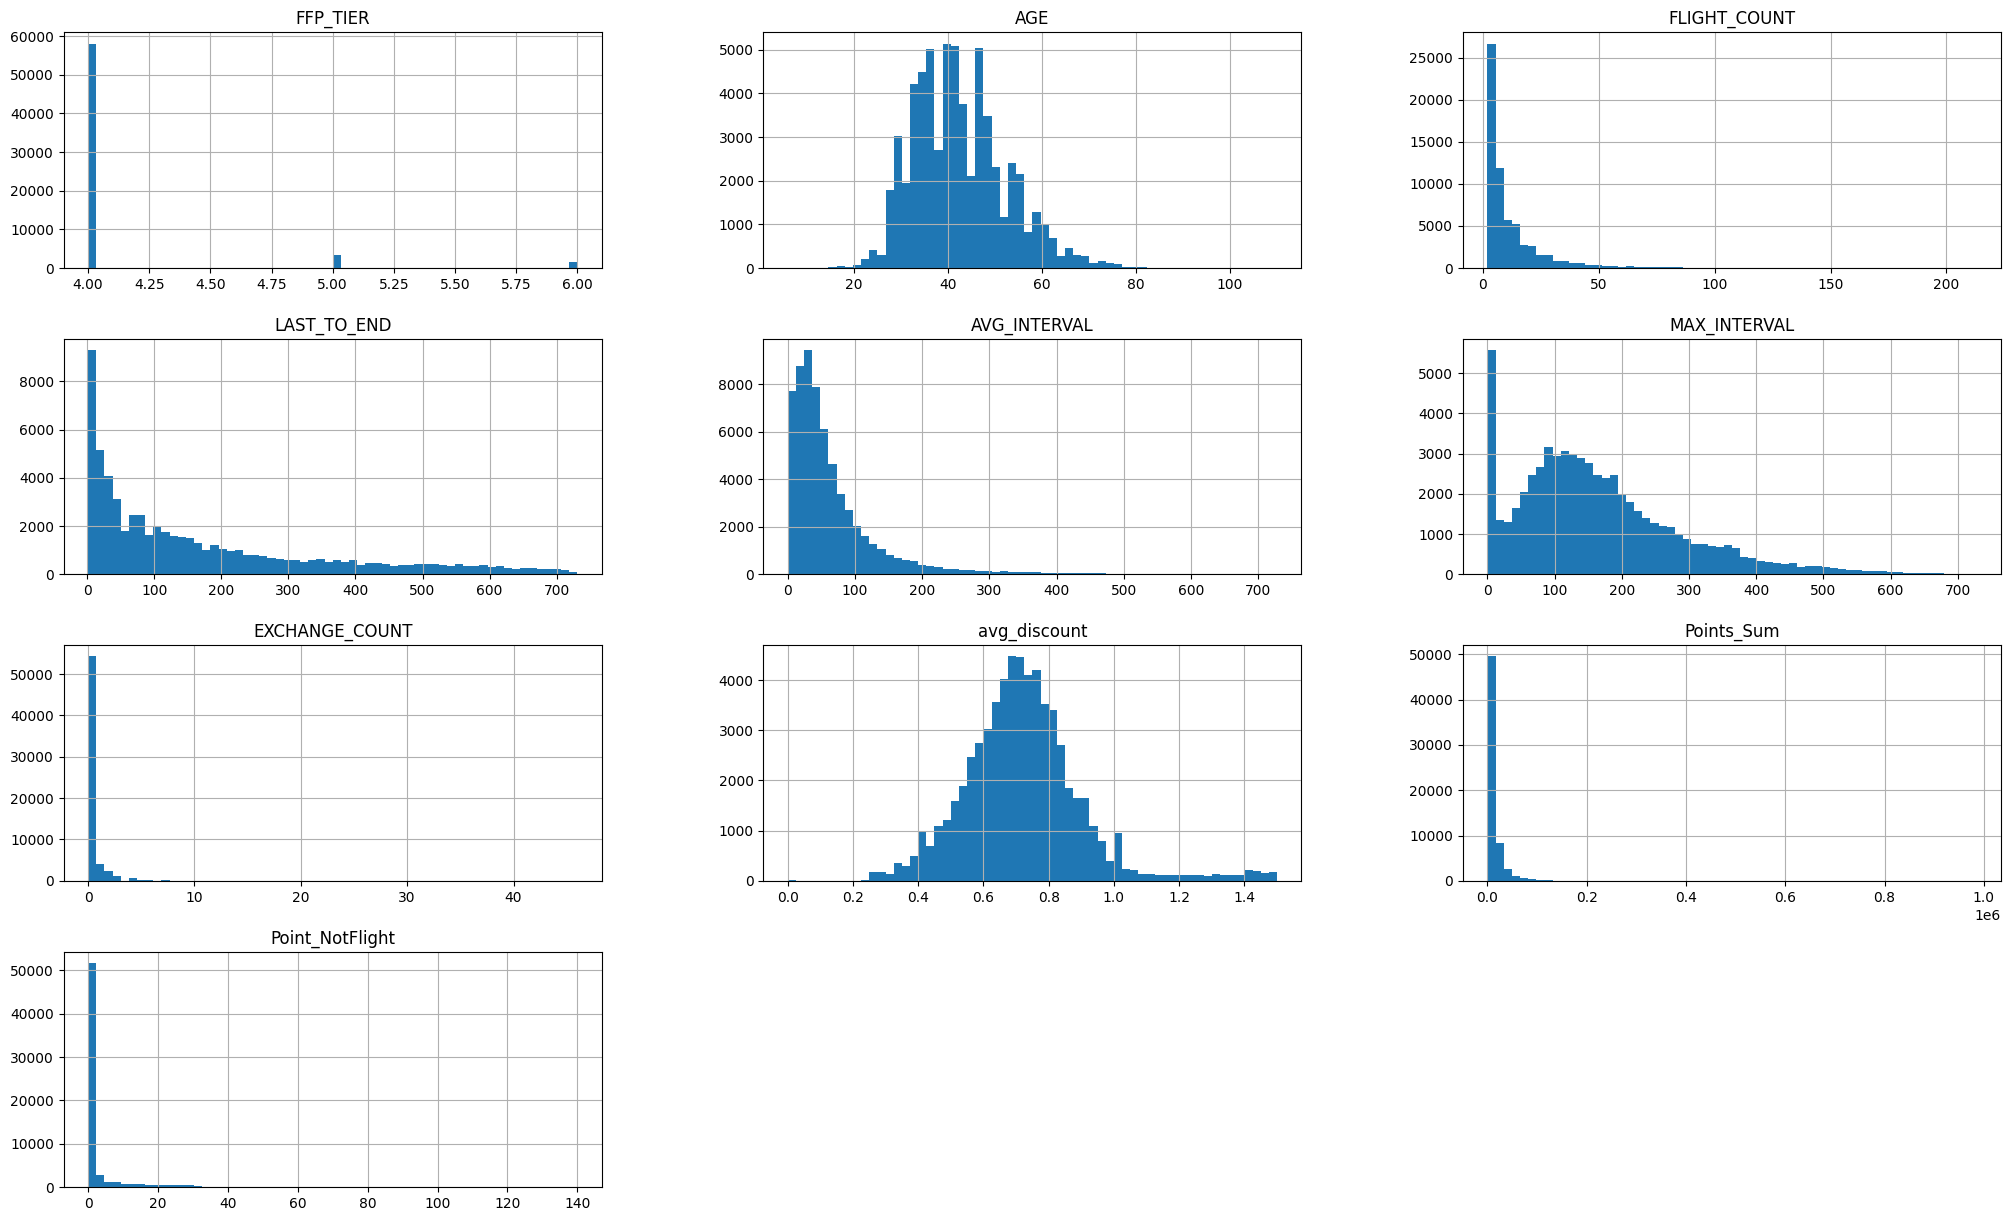

In [ ]:
data.hist(bins=60, figsize=(25,15))

In [ ]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY','AVG_INTERVAL', 'avg_discount']
nums = ['FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'LAST_TO_END','MAX_INTERVAL', 'EXCHANGE_COUNT','Points_Sum', 'Point_NotFlight']
timestamp = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

In [ ]:
data[nums].describe()

,FFP_TIER,AGE,FLIGHT_COUNT,LAST_TO_END,MAX_INTERVAL,EXCHANGE_COUNT,Points_Sum,Point_NotFlight
count,62988.000000,62568.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,4.102162,42.476346,11.839414,176.120102,166.033895,0.319775,12545.7771,2.728155
std,0.373856,9.885915,14.049471,183.822223,123.397180,1.136004,20507.8167,7.364164
min,4.000000,6.000000,2.000000,1.000000,0.000000,0.000000,0.0000,0.000000
25%,4.000000,35.000000,3.000000,29.000000,79.000000,0.000000,2775.0000,0.000000
50%,4.000000,41.000000,7.000000,108.000000,143.000000,0.000000,6328.5000,0.000000
75%,4.000000,48.000000,15.000000,268.000000,228.000000,0.000000,14302.5000,1.000000
max,6.000000,110.000000,213.000000,731.000000,728.000000,46.000000,985572.0000,140.000000


In [ ]:
data[cats].describe()

,AVG_INTERVAL,avg_discount
count,62988.000000,62988.000000
mean,67.749788,0.721558
std,77.517866,0.185427
min,0.000000,0.000000
25%,23.370370,0.611997
50%,44.666667,0.711856
75%,82.000000,0.809476
max,728.000000,1.500000


In [ ]:
data.isna().sum()

FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [ ]:
data =data.dropna()

In [ ]:
data

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,3/31/2014,1,3.483254,18,34,0.961639,619760,50
2,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,3/27/2014,5,4.788079,47,27,0.970658,338813,39
5,2/10/2008,9/29/2009,Male,6,guangzhou,guangdong,CN,64.0,3/31/2014,92,1/13/2014,79,7.043956,52,10,0.967692,343121,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,5/20/2011,6/5/2013,Female,4,guangzhou,guangdong,CN,25.0,3/31/2014,2,6/9/2013,297,4.000000,4,1,0.000000,12318,22
62984,3/8/2010,9/14/2013,Male,4,foshan,guangdong,CN,38.0,3/31/2014,4,1/3/2014,89,37.000000,60,14,0.000000,106972,43
62985,3/30/2006,12/2/2006,Female,4,guangzhou,guangdong,CN,43.0,3/31/2014,2,3/3/2014,29,166.000000,166,0,0.000000,0,0
62986,2/6/2013,2/14/2013,Female,4,guangzhou,guangdong,CN,36.0,3/31/2014,2,2/26/2013,400,12.000000,12,0,0.000000,0,0


In [ ]:
for col in cats:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

# Periksa kembali apakah masih ada missing value
print(data.isnull().sum())

FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64


In [ ]:
for col in nums:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)

# Periksa kembali apakah masih ada missing value
print(data.isnull().sum())

FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64


In [ ]:
for col in timestamp:
    # Mengisi missing value dengan tanggal rata-rata atau tanggal terakhir yang tersedia
    data[col].fillna(data[col].mode()[0], inplace=True)

# Periksa kembali apakah masih ada missing value
print(data.isnull().sum())

FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64


In [ ]:
data

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,3/31/2014,1,3.483254,18,34,0.961639,619760,50
2,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,3/27/2014,5,4.788079,47,27,0.970658,338813,39
5,2/10/2008,9/29/2009,Male,6,guangzhou,guangdong,CN,64.0,3/31/2014,92,1/13/2014,79,7.043956,52,10,0.967692,343121,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,5/20/2011,6/5/2013,Female,4,guangzhou,guangdong,CN,25.0,3/31/2014,2,6/9/2013,297,4.000000,4,1,0.000000,12318,22
62984,3/8/2010,9/14/2013,Male,4,foshan,guangdong,CN,38.0,3/31/2014,4,1/3/2014,89,37.000000,60,14,0.000000,106972,43
62985,3/30/2006,12/2/2006,Female,4,guangzhou,guangdong,CN,43.0,3/31/2014,2,3/3/2014,29,166.000000,166,0,0.000000,0,0
62986,2/6/2013,2/14/2013,Female,4,guangzhou,guangdong,CN,36.0,3/31/2014,2,2/26/2013,400,12.000000,12,0,0.000000,0,0


In [ ]:
duplicate_rows = data[data.duplicated()]
print("Duplicate Rows except first occurrence:")
print(duplicate_rows)

Duplicate Rows except first occurrence:
        FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER WORK_CITY WORK_PROVINCE  \
49085  8/11/2012         8/11/2012   Male         4    panjin      liaoning   

      WORK_COUNTRY   AGE  LOAD_TIME  FLIGHT_COUNT LAST_FLIGHT_DATE  \
49085           CN  40.0  3/31/2014             2        8/18/2012   

       LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  \
49085          592           7.0             7               0      0.600021   

       Points_Sum  Point_NotFlight  
49085        1841                0  


In [ ]:
data_no_duplicates = data.drop_duplicates()

In [ ]:
data.describe()

,FFP_TIER,AGE,FLIGHT_COUNT,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,58913.000000,58913.000000,58913.000000,58913.000000,58913.000000,58913.000000,58913.000000,58913.000000,58913.000000,58913.000000
mean,4.103746,42.210802,11.962317,174.668986,67.516064,165.945038,0.325310,0.720325,12626.023849,2.801046
std,0.376387,9.759387,14.193238,183.204361,77.286701,123.094983,1.143422,0.184333,20523.480366,7.474037
min,4.000000,6.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,35.000000,3.000000,29.000000,23.333333,79.000000,0.000000,0.611394,2801.000000,0.000000
50%,4.000000,41.000000,7.000000,106.000000,44.500000,143.000000,0.000000,0.711322,6389.000000,0.000000
75%,4.000000,48.000000,15.000000,265.000000,81.750000,227.000000,0.000000,0.808534,14401.000000,1.000000
max,6.000000,110.000000,213.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000


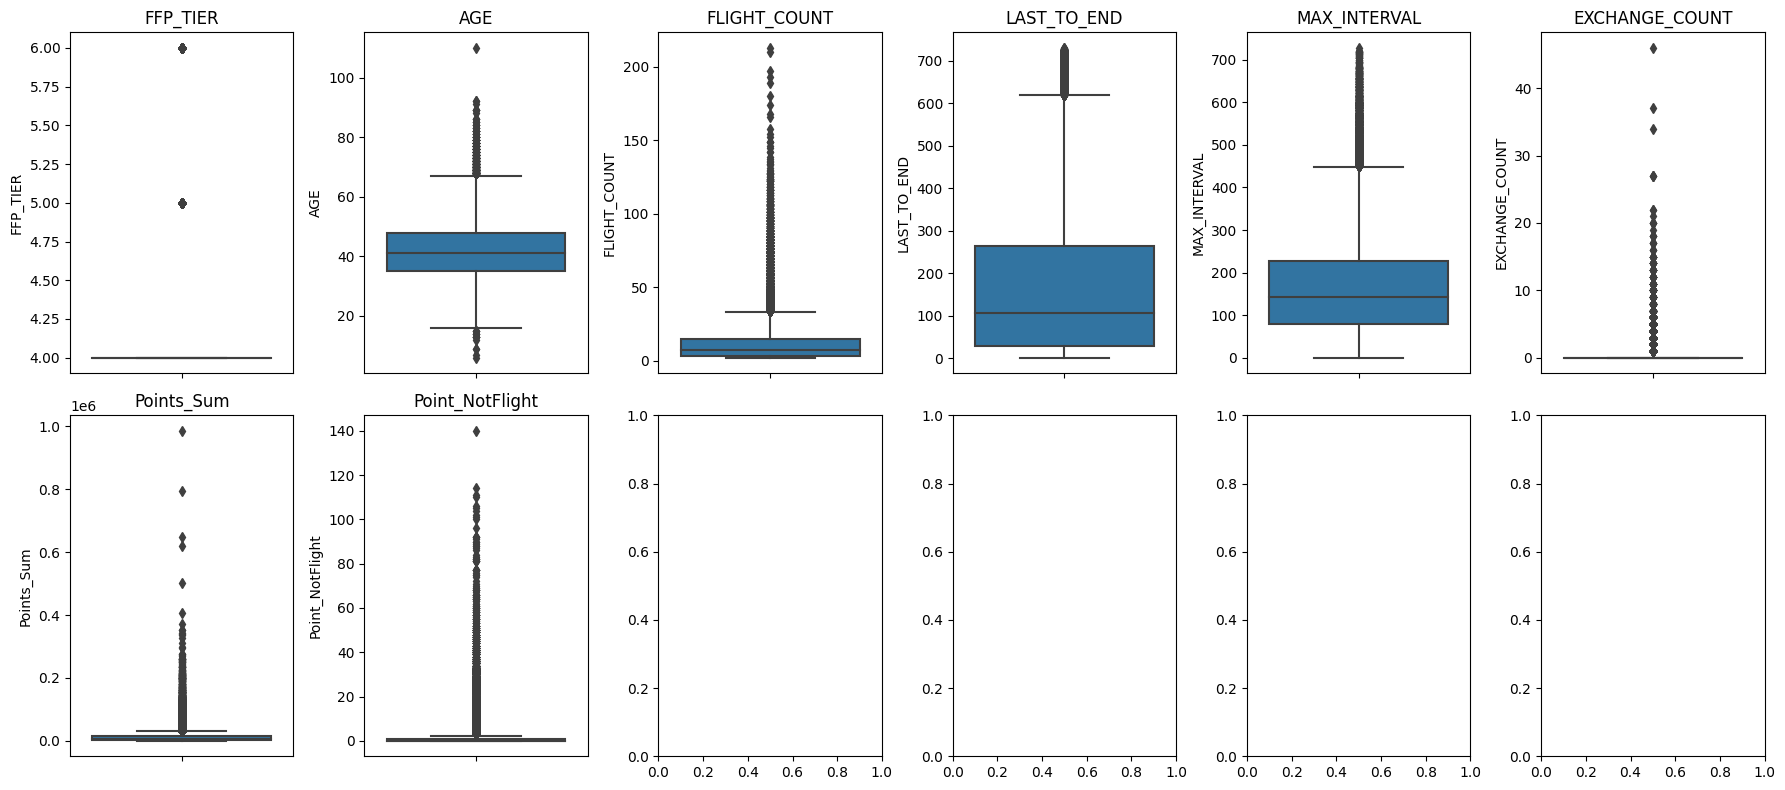

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(18, 8))

# Iterasi melalui setiap kolom numerik
for i, feature in enumerate(nums):
    row, col = i // 6, i % 6
    sns.boxplot(y=data[feature], ax=axes[row, col])
    axes[row, col].set_title(feature)

# Mengatur layout dan menampilkan grafik
plt.tight_layout()
plt.show()

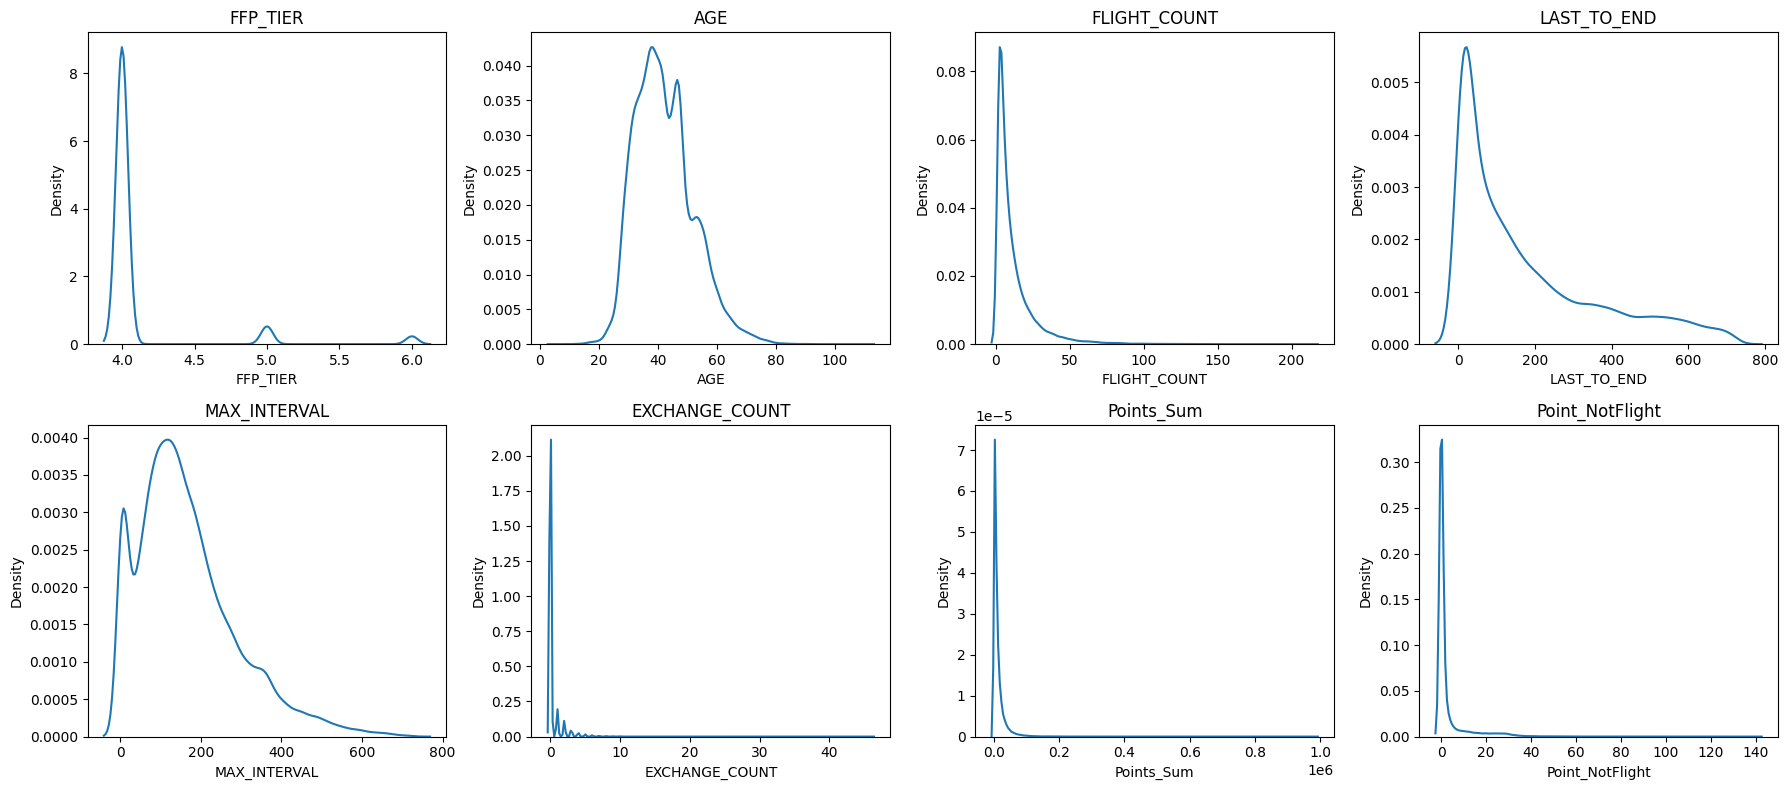

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 8))

# Iterasi melalui setiap kolom numerik
for i, feature in enumerate(nums):
    row, col = i // 4, i % 4
    sns.kdeplot(x=data[feature], ax=axes[row, col])
    axes[row, col].set_title(feature)
    axes[row, col].set_xlabel(feature)

# Mengatur layout dan menampilkan grafik
plt.tight_layout()
plt.show()

In [ ]:
# Memilih kolom-kolom kategorikal
kolom_kategorikal = data.select_dtypes(include=['object'])

# Menampilkan nama-nama kolom kategorikal
print("Kolom Kategorikal:")
print(kolom_kategorikal.columns)

Kolom Kategorikal:
Index(['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE',
       'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE'],
      dtype='object')


In [ ]:
# Menghitung jumlah unique values untuk setiap kolom kategorikal
count_unique_ffp_date = data['FFP_DATE'].nunique()
count_unique_first_flight_date = data['FIRST_FLIGHT_DATE'].nunique()
count_unique_gender = data['GENDER'].nunique()
count_unique_work_city = data['WORK_CITY'].nunique()
count_unique_work_province = data['WORK_PROVINCE'].nunique()
count_unique_work_country = data['WORK_COUNTRY'].nunique()
count_unique_load_time = data['LOAD_TIME'].nunique()
count_unique_last_flight_date = data['LAST_FLIGHT_DATE'].nunique()

# Menampilkan jumlah unique values untuk setiap kolom
print("Jumlah Unique Values FFP_DATE:", count_unique_ffp_date)
print("Jumlah Unique Values FIRST_FLIGHT_DATE:", count_unique_first_flight_date)
print("Jumlah Unique Values GENDER:", count_unique_gender)
print("Jumlah Unique Values WORK_CITY:", count_unique_work_city)
print("Jumlah Unique Values WORK_PROVINCE:", count_unique_work_province)
print("Jumlah Unique Values WORK_COUNTRY:", count_unique_work_country)
print("Jumlah Unique Values LOAD_TIME:", count_unique_load_time)
print("Jumlah Unique Values LAST_FLIGHT_DATE:", count_unique_last_flight_date)


Jumlah Unique Values FFP_DATE: 3062
Jumlah Unique Values FIRST_FLIGHT_DATE: 3399
Jumlah Unique Values GENDER: 2
Jumlah Unique Values WORK_CITY: 2959
Jumlah Unique Values WORK_PROVINCE: 1132
Jumlah Unique Values WORK_COUNTRY: 106
Jumlah Unique Values LOAD_TIME: 1
Jumlah Unique Values LAST_FLIGHT_DATE: 731


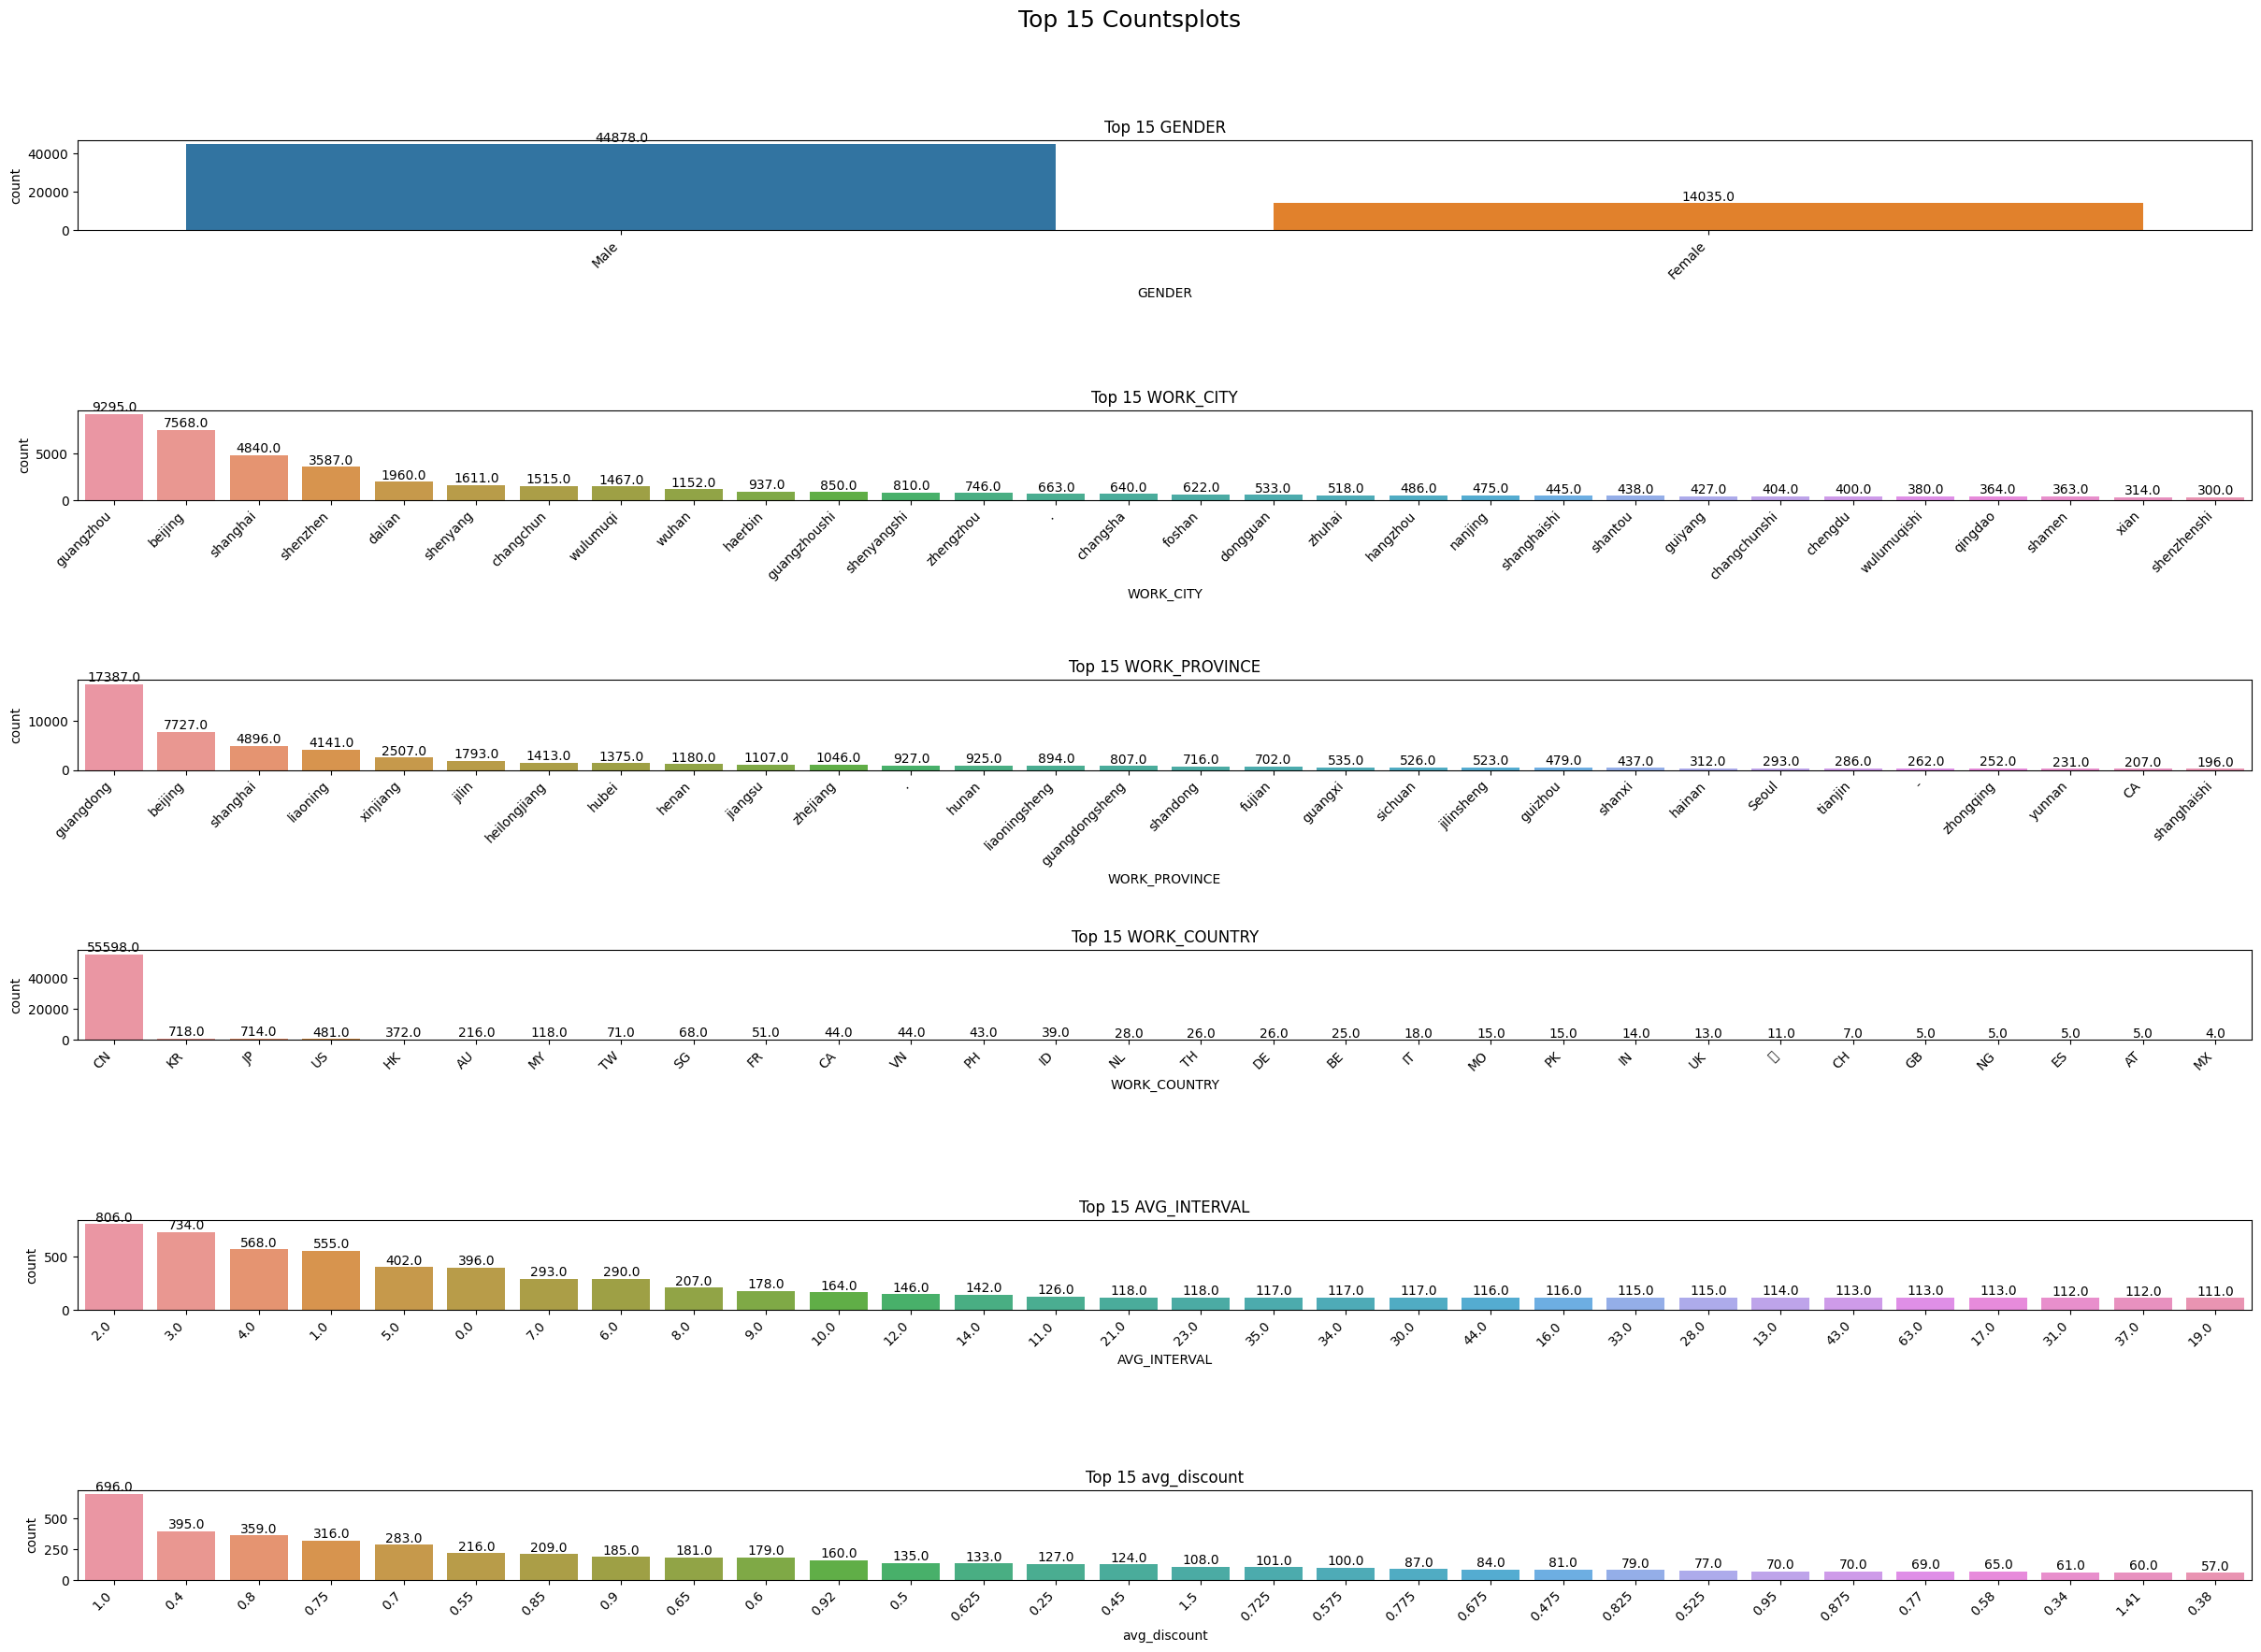

In [ ]:
# top count untuk kolom profession, city, dan state

fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(30, 20))
plt.subplots_adjust(hspace=2)
fig.suptitle("Top 15 Countsplots", fontsize=18, y=0.95)


#Construct subplots
for col , ax in zip(['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY','AVG_INTERVAL', 'avg_discount'] , axs.ravel()):
    countplot = sns.countplot(ax = ax ,data=data,  x= col , order=data[col].value_counts().iloc[:30].index)
    countplot.set_title("Top 15 "+ col)
    countplot.set_xticklabels(countplot.get_xticklabels(), rotation=45, horizontalalignment='right')
    for p in countplot.patches:
        countplot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.show()

<Figure size 1500x1500 with 0 Axes>

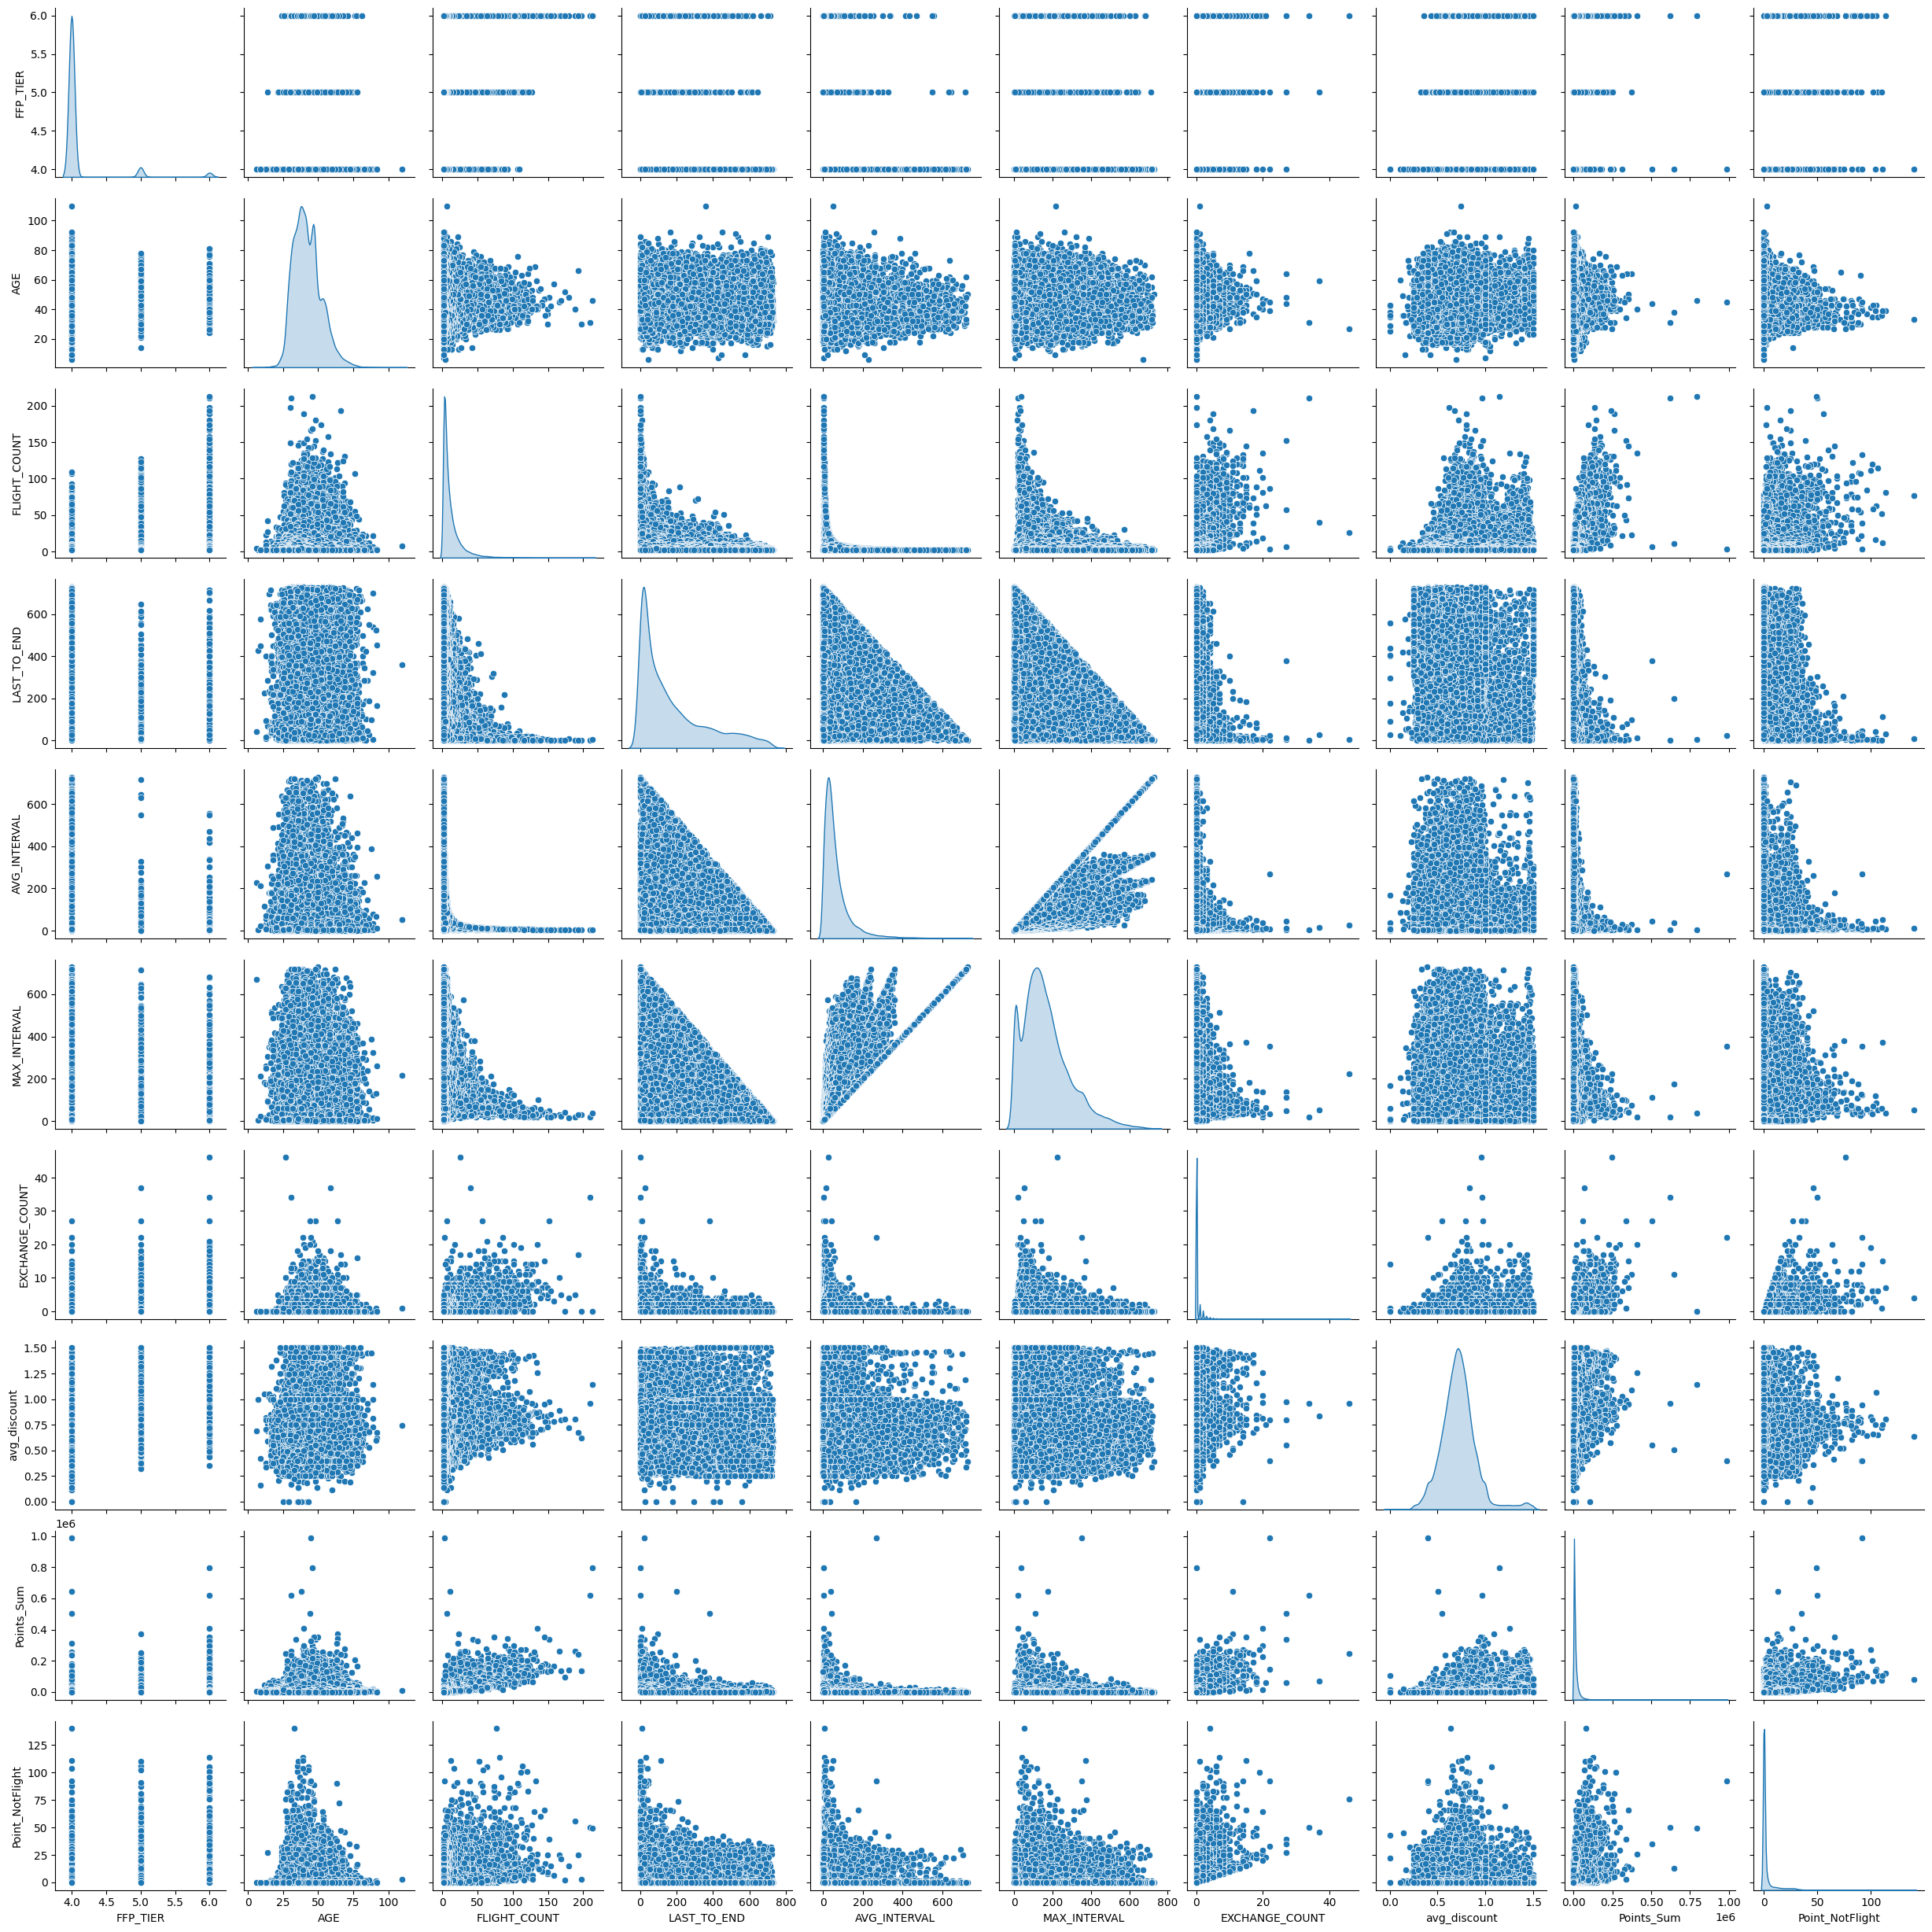

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(data, diag_kind='kde')

# No 2 Pilih fitur-fitur yang menurut teman-teman masuk akal secara bisnis untuk digunakan sebagai fitur clustering. Lakukan feature engineering!

## Feature Selection

In [ ]:
correlation_matrix = data.corr()

<Axes: >

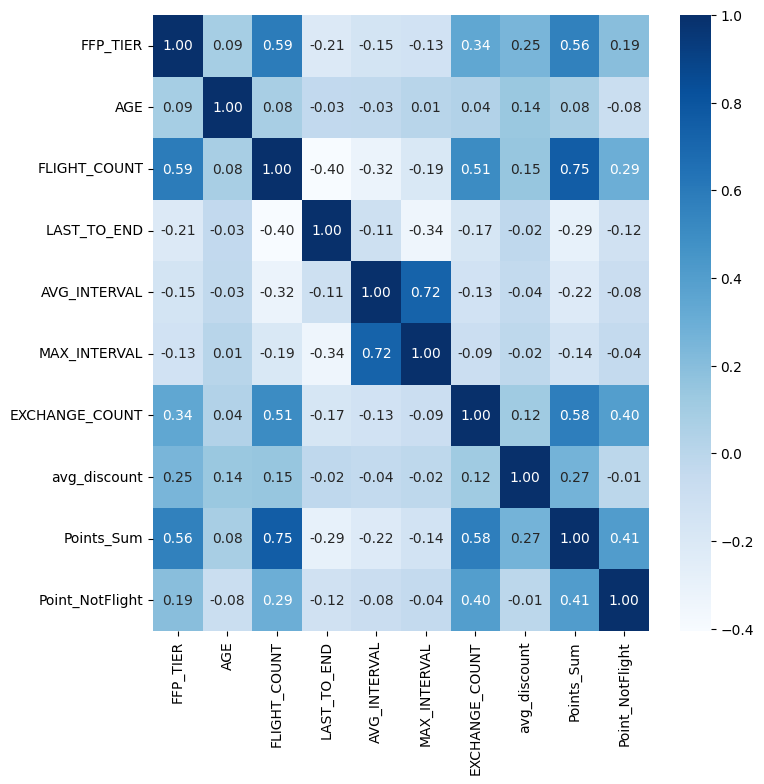

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
threshold = 0.7
high_correlation_pairs = (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1.0)
high_correlation_columns = [col for col in high_correlation_pairs.columns if any(high_correlation_pairs[col])]
print("Kolom-kolom dengan Korelasi Tinggi:")
print(high_correlation_columns)

Kolom-kolom dengan Korelasi Tinggi:
['FLIGHT_COUNT', 'AVG_INTERVAL', 'MAX_INTERVAL', 'Points_Sum']


## Feature Extraction

In [ ]:
# Copy data asli
df = data.copy()

# Cek data
df.head()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,3/31/2014,1,3.483254,18,34,0.961639,619760,50
2,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,3/27/2014,5,4.788079,47,27,0.970658,338813,39
5,2/10/2008,9/29/2009,Male,6,guangzhou,guangdong,CN,64.0,3/31/2014,92,1/13/2014,79,7.043956,52,10,0.967692,343121,15


In [ ]:
# Filter data yang digunakan untuk modeling berdasarkan nilai korelasi
df_filter = df[['FLIGHT_COUNT','LAST_TO_END','MAX_INTERVAL','EXCHANGE_COUNT','avg_discount','Points_Sum','AVG_INTERVAL']]

# Cek data
df_filter.head()

,FLIGHT_COUNT,LAST_TO_END,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,AVG_INTERVAL
0,210,1,18,34,0.961639,619760,3.483254
2,135,11,18,20,1.254676,406361,5.298507
3,23,97,73,11,1.090870,372204,27.863636
4,152,5,47,27,0.970658,338813,4.788079
5,92,79,52,10,0.967692,343121,7.043956


In [ ]:
# kombinasi linier dari beberapa fitur
df_filter['Travel_Score'] = df_filter['FLIGHT_COUNT'] / (df_filter['LAST_TO_END'])

# Cek data
df_filter.sample(10)

,FLIGHT_COUNT,LAST_TO_END,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,AVG_INTERVAL,Travel_Score
43380,3,6,583,0,0.645647,2474,350.000000,0.500000
52207,2,38,67,0,0.770000,2640,67.000000,0.052632
38014,7,329,185,0,0.619566,16131,61.833333,0.021277
55691,2,5,101,0,0.892612,2009,101.000000,0.400000
3428,47,114,84,0,0.723054,37554,12.500000,0.412281
59034,2,68,126,0,0.831195,1322,126.000000,0.029412
10815,27,12,94,0,0.626033,17000,25.076923,2.250000
62185,2,178,218,0,0.625000,854,218.000000,0.011236
7878,16,25,145,0,0.695000,17306,32.733333,0.640000
61028,2,635,10,0,0.291146,413,10.000000,0.003150


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Inisialisasi scaler
standard_scaler = StandardScaler()

# Standarisasi
df_filter['FLIGHT_COUNT_std'] = standard_scaler.fit_transform(df_filter[['FLIGHT_COUNT']])
df_filter['LAST_TO_END_std'] = standard_scaler.fit_transform(df_filter[['LAST_TO_END']])
df_filter['MAX_INTERVAL_std'] = standard_scaler.fit_transform(df_filter[['MAX_INTERVAL']])
df_filter['EXCHANGE_COUNT_std'] = standard_scaler.fit_transform(df_filter[['EXCHANGE_COUNT']])
df_filter['avg_discount_std'] = standard_scaler.fit_transform(df_filter[['avg_discount']])
df_filter['Points_Sum_std'] = standard_scaler.fit_transform(df_filter[['Points_Sum']])
df_filter['AVG_INTERVAL_std'] = standard_scaler.fit_transform(df_filter[['AVG_INTERVAL']])
df_filter['Travel_Score_std'] = standard_scaler.fit_transform(df_filter[['Travel_Score']])

# Cek data
df_filter.head()

,FLIGHT_COUNT,LAST_TO_END,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,AVG_INTERVAL,Travel_Score,FLIGHT_COUNT_std,LAST_TO_END_std,MAX_INTERVAL_std,EXCHANGE_COUNT_std,avg_discount_std,Points_Sum_std,AVG_INTERVAL_std,Travel_Score_std
0,210,1,18,34,0.961639,619760,3.483254,210.000000,13.953079,-0.947960,-1.201887,29.451035,1.309132,29.582659,-0.828517,34.531368
2,135,11,18,20,1.254676,406361,5.298507,12.272727,8.668827,-0.893376,-1.201887,17.206988,2.898859,19.184773,-0.805030,1.805549
3,23,97,73,11,1.090870,372204,27.863636,0.237113,0.777679,-0.423951,-0.755074,9.335815,2.010209,17.520470,-0.513061,-0.186464
4,152,5,47,27,0.970658,338813,4.788079,30.400000,9.866591,-0.926127,-0.966295,23.329012,1.358060,15.893491,-0.811634,4.805792
5,92,79,52,10,0.967692,343121,7.043956,1.164557,5.639190,-0.522203,-0.925675,8.461240,1.341972,16.103398,-0.782445,-0.032963


Reason: <br>
Pilihan antara normalisasi dan standarisasi tergantung pada kebutuhan model dan data yang digunakan. Beberapa algoritma machine learning, seperti Support Vector Machines (SVM) atau algoritma k-means, dapat memperoleh manfaat dari standarisasi, sedangkan algoritma lain, seperti neural networks, bisa mendapat manfaat dari normalisasi.

In [ ]:
# Drop kolom yang tdk di standarisasi
df_filter_std = df_filter[['FLIGHT_COUNT_std','LAST_TO_END_std','MAX_INTERVAL_std','EXCHANGE_COUNT_std','avg_discount_std','Points_Sum_std','AVG_INTERVAL_std','Travel_Score_std']]

# Cek data
df_filter_std.sample(5)

,FLIGHT_COUNT_std,LAST_TO_END_std,MAX_INTERVAL_std,EXCHANGE_COUNT_std,avg_discount_std,Points_Sum_std,AVG_INTERVAL_std,Travel_Score_std
13579,0.143568,0.569484,-0.080792,-0.284508,-0.136909,0.315543,-0.423710,-0.217403
32535,0.002655,-0.549495,0.146676,-0.284508,-1.315663,-0.373235,-0.267809,-0.198869
43588,-0.631455,-0.713248,1.568355,-0.284508,-0.833597,-0.502795,1.591283,-0.214424
38490,-0.490542,-0.827875,0.301030,-0.284508,-0.367936,-0.454460,-0.087546,-0.189728
55302,-0.701912,1.939550,-0.787570,-0.284508,1.517241,-0.527012,0.019201,-0.225084


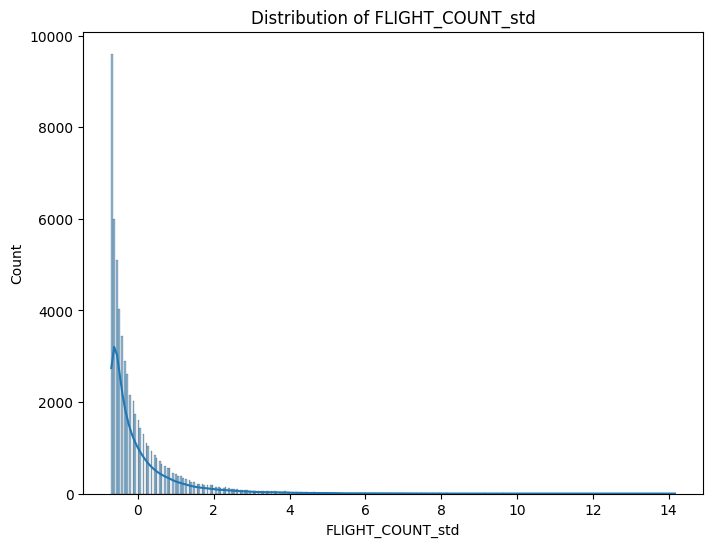

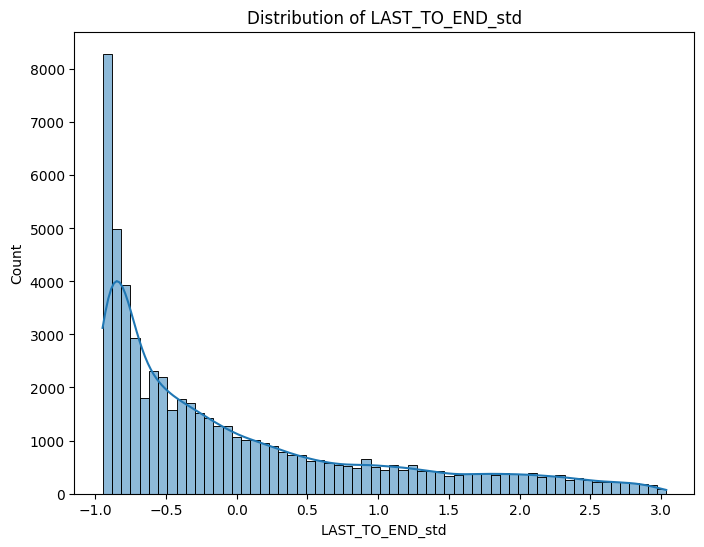

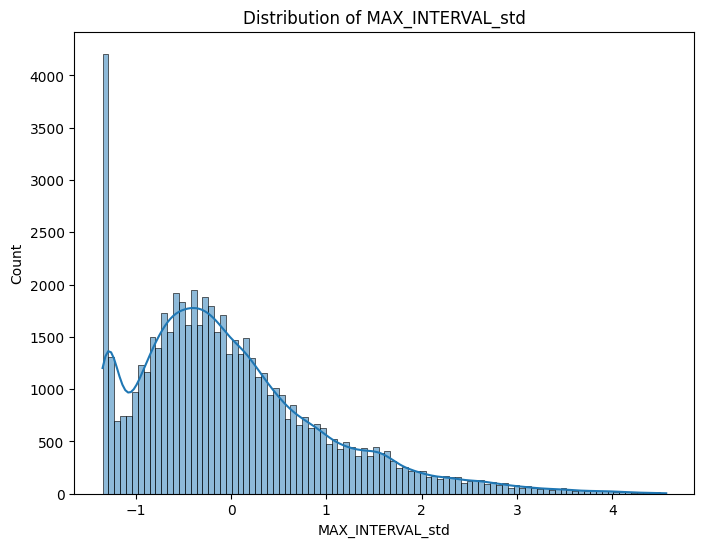

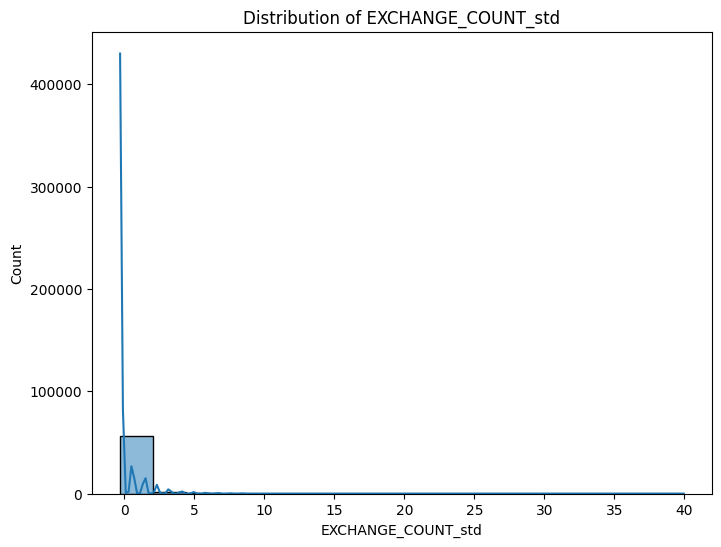

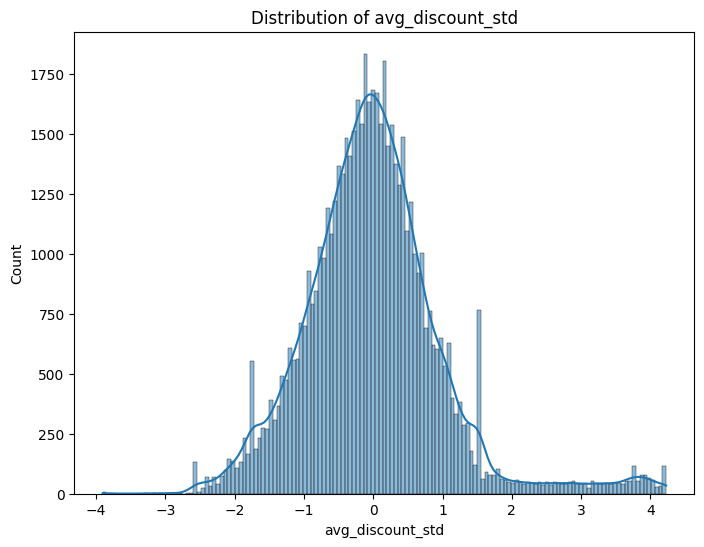

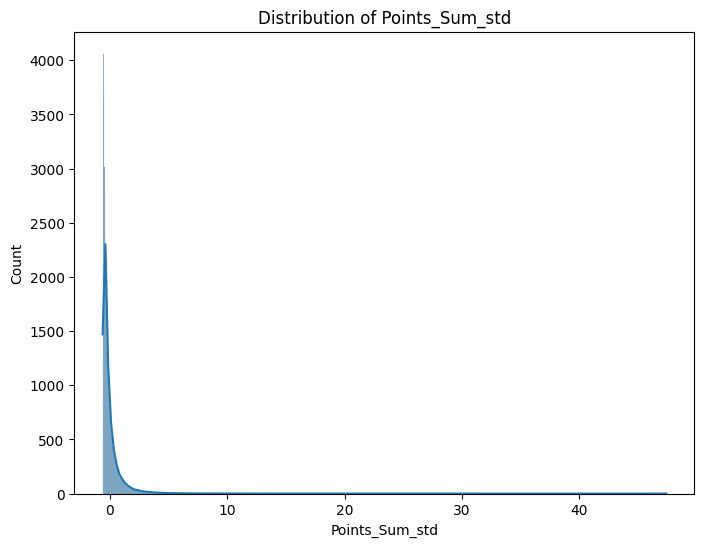

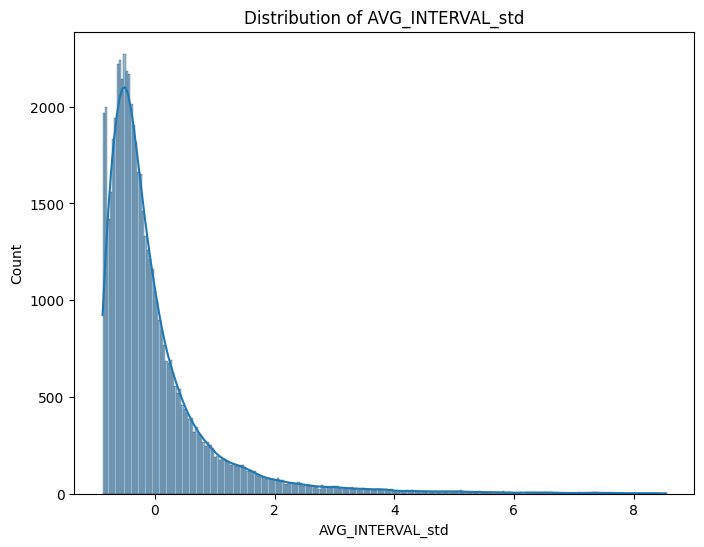

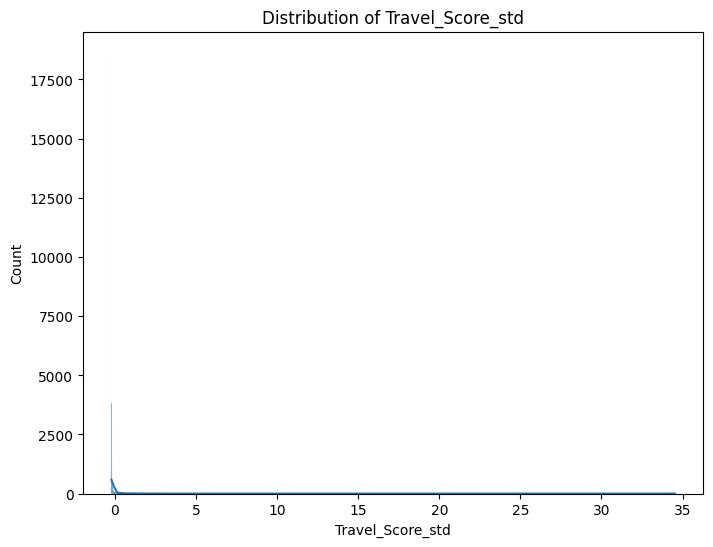

In [ ]:
# Membuat histogram untuk setiap fitur
for col in df_filter_std:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_filter_std[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

## No 3 Modelling with K-Means Clustering

### Modelling

In [ ]:
df_filter_std

,FLIGHT_COUNT_std,LAST_TO_END_std,MAX_INTERVAL_std,EXCHANGE_COUNT_std,avg_discount_std,Points_Sum_std,AVG_INTERVAL_std,Travel_Score_std
0,13.953079,-0.947960,-1.201887,29.451035,1.309132,29.582659,-0.828517,34.531368
2,8.668827,-0.893376,-1.201887,17.206988,2.898859,19.184773,-0.805030,1.805549
3,0.777679,-0.423951,-0.755074,9.335815,2.010209,17.520470,-0.513061,-0.186464
4,9.866591,-0.926127,-0.966295,23.329012,1.358060,15.893491,-0.811634,4.805792
5,5.639190,-0.522203,-0.925675,8.461240,1.341972,16.103398,-0.782445,-0.032963
...,...,...,...,...,...,...,...,...
62983,-0.701912,0.667735,-1.315622,0.590067,-3.907771,-0.015008,-0.821831,-0.224594
62984,-0.560998,-0.467618,-0.860684,11.959539,-3.907771,4.597016,-0.394846,-0.218270
62985,-0.701912,-0.795124,0.000447,-0.284508,-3.907771,-0.615204,1.274278,-0.214294
62986,-0.701912,1.229954,-1.250631,-0.284508,-3.907771,-0.615204,-0.718319,-0.224881


In [ ]:
df_filter_std.keys()

Index(['FLIGHT_COUNT_std', 'LAST_TO_END_std', 'MAX_INTERVAL_std',
       'EXCHANGE_COUNT_std', 'avg_discount_std', 'Points_Sum_std',
       'AVG_INTERVAL_std', 'Travel_Score_std'],
      dtype='object')

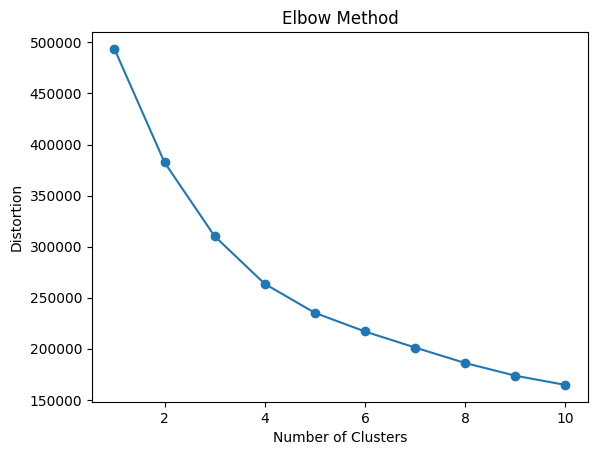

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Temukan jumlah cluster optimal dengan elbow method
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_filter_std)
    distortions.append(kmeans.inertia_)

# Plot elbow method
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

Dipilih Cluster sebanyak 5 dengan kondisi tidak menggunakan Cluster yang terlalu banyak namun nilai cukup baik karena nilai setelah tidak terlalu menggambarkan grafik yang terlalu signifikan

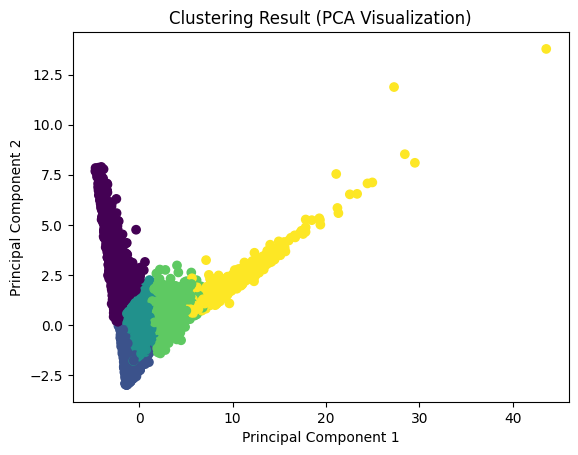

Silhouette Score: 0.2882537131047048


In [ ]:
# Gantilah 'optimal_k' dengan nilai yang dianggap optimal
optimal_k = 5

# Lakukan clustering menggunakan K-means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_filter_std['Cluster'] = kmeans.fit_predict(df_filter_std)

# Evaluasi cluster dengan visualisasi menggunakan PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_filter_std)

# Visualisasi hasil clustering
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_filter_std['Cluster'], cmap='viridis')
plt.title('Clustering Result (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Evaluasi cluster dengan silhouette score
silhouette_avg = silhouette_score(df_filter_std, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

In [ ]:
df_filter_std

,FLIGHT_COUNT_std,LAST_TO_END_std,MAX_INTERVAL_std,EXCHANGE_COUNT_std,avg_discount_std,Points_Sum_std,AVG_INTERVAL_std,Travel_Score_std,Cluster
0,13.953079,-0.947960,-1.201887,29.451035,1.309132,29.582659,-0.828517,34.531368,4
2,8.668827,-0.893376,-1.201887,17.206988,2.898859,19.184773,-0.805030,1.805549,4
3,0.777679,-0.423951,-0.755074,9.335815,2.010209,17.520470,-0.513061,-0.186464,4
4,9.866591,-0.926127,-0.966295,23.329012,1.358060,15.893491,-0.811634,4.805792,4
5,5.639190,-0.522203,-0.925675,8.461240,1.341972,16.103398,-0.782445,-0.032963,4
...,...,...,...,...,...,...,...,...,...
62983,-0.701912,0.667735,-1.315622,0.590067,-3.907771,-0.015008,-0.821831,-0.224594,1
62984,-0.560998,-0.467618,-0.860684,11.959539,-3.907771,4.597016,-0.394846,-0.218270,4
62985,-0.701912,-0.795124,0.000447,-0.284508,-3.907771,-0.615204,1.274278,-0.214294,2
62986,-0.701912,1.229954,-1.250631,-0.284508,-3.907771,-0.615204,-0.718319,-0.224881,1


In [ ]:
# Gantilah 'optimal_k' dengan nilai yang dianggap optimal
optimal_k = 5

# Lakukan clustering menggunakan K-means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_filter_std['Cluster'] = kmeans.fit_predict(df_filter_std)

# Mendapatkan nilai pusat dari setiap cluster
cluster_centers = kmeans.cluster_centers_

# Konversi pusat cluster ke dalam DataFrame untuk memudahkan interpretasi
df_cluster_centers = pd.DataFrame(cluster_centers, columns=df_filter_std.columns)

# Tampilkan DataFrame yang berisi pusat dari masing-masing cluster
print("Cluster Centers:")
print(df_cluster_centers)

Cluster Centers:
   FLIGHT_COUNT_std  LAST_TO_END_std  MAX_INTERVAL_std  EXCHANGE_COUNT_std  \
0         -0.560713         1.573742         -0.826149           -0.242371   
1         -0.073654        -0.432708         -0.000331           -0.166547   
2          1.741547        -0.748856         -0.485031            1.109962   
3          4.486854        -0.907560         -0.818827            4.312208   
4         -0.561065        -0.242786          1.706053           -0.231082   

   avg_discount_std  Points_Sum_std  AVG_INTERVAL_std  Travel_Score_std  \
0         -0.046672       -0.415803         -0.422996         -0.224094   
1         -0.074897       -0.125196         -0.175139         -0.116286   
2          0.502972        1.449561         -0.596862          0.604115   
3          0.784947        4.725832         -0.727132          5.924837   
4         -0.105567       -0.401336          1.784124         -0.193733   

        Cluster  
0  1.000000e+00  
1  2.000000e+00  
2  3.0000

### Evaluation

In [ ]:
# Evaluasi cluster dengan silhouette score
silhouette_avg = silhouette_score(df_filter_std, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.2904077415166286


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Evaluasi cluster dengan Davies-Bouldin Index
db_index = davies_bouldin_score(df_filter_std, df_filter_std['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 1.1303101628898262


Nilai 0.29 pada Silhouette, menunjukkan bahwa clustering tersebut memiliki sejumlah besar overlapping antar cluster, namun tetap menunjukkan sejauh mana setiap data point berada dalam clusternya masing-masing.


Nilai 1.13 pada Davis Bouldin menunjukkan tingkat overlap yang moderat antara cluster dan sejauh mana cluster-cluster tersebut berbeda satu sama lain.


**Kesimpulan:**

Meskipun Silhouette Score menunjukkan adanya overlap antar cluster, Davies-Bouldin Index menunjukkan bahwa cluster tersebut masih cukup terpisah dan terdefinisi dengan baik.
Interpretasi ini bersifat relatif tergantung pada data dan konteks spesifik dari masalah clustering yang sedang dihadapi. Sebaiknya, evaluasi ini harus dilihat bersamaan dengan pemahaman yang lebih mendalam tentang data dan tujuan clustering.

## Interpretasi Model dan Rekomendasi


Silhouette Score dan Davies-Bouldin Index merupakan metrik yang digunakan untuk mengevaluasi kualitas hasil pengelompokan.

Silhouette Score adalah ukuran seberapa mirip sebuah objek dengan klasternya sendiri (kohesi) dibandingkan dengan klaster lain (pemisahan).
Skor berkisar dari -1 hingga 1. Skor siluet yang lebih tinggi menunjukkan klaster yang terdefinisi dengan lebih baik.
Silhouette Score 0,2904 menunjukkan bahwa klaster-klaster cukup terpisah dengan baik, tetapi masih ada ruang untuk perbaikan.

Davies-Bouldin Index adalah metrik validasi klaster internal lainnya. Indeks ini mengukur rasio kemiripan rata-rata setiap klaster dengan klaster yang paling mirip dengannya.
Nilai Davies-Bouldin Index yang lebih rendah menunjukkan pengelompokan yang lebih baik. Nilai minimumnya adalah 0, yang mengindikasikan cluster yang terpisah sempurna.
Nilai 1.1303 menunjukkan pemisahan yang wajar antara cluster, tetapi juga menunjukkan bahwa ada beberapa tumpang tindih (overlap) antara cluster.

Rekomendasi:

Nilai Silhouette 0,29 tidak buruk, tetapi masih bisa ditingkatkan. Mencoba nilai K (jumlah cluster) yang berbeda dalam K-means bisa dilakukan untuk melihat apakah ada nilai yang menghasilkan Silhouette Score yang lebih tinggi.